## Project 15: Analysis of Political corpus

5.	We want to test the analogy between Pro and Con classification with sentiment analysis. Therefore use SentiStrength sentiment score. For this purpose, write a script that estimate the overall sentiment score for each argument text leg in the discussion part. Distinguish two variables V1 (a binary variable stating Pro or Con as in the original label) and V2 reporting the overall sentiment score from SentiStrength. Then use Pearson correlation coefficient to test correlation score and its p-value for each category.

In [2]:
import os
import pandas as pd
import numpy as np

In [6]:
#!unzip abortion.zip
!unzip SentiStrength_Data.zip

Archive:  SentiStrength_Data.zip
  inflating: IdiomLookupTable.txt    
  inflating: SentimentLookupTable.txt  
  inflating: NegatingWordList.txt    
  inflating: SlangLookupTable.txt    
  inflating: FilmAddition.txt        
  inflating: MusicAddition.txt       
  inflating: PoliticsAddition.txt    
  inflating: BoosterWordList.txt     
  inflating: Dictionary.txt          
  inflating: IronyTerms.txt          
  inflating: RiotsAddition.txt       
  inflating: MobilePhoneAddition.txt  
  inflating: QuestionWords.txt       
  inflating: EmoticonLookupTable.txt  


In [3]:
dataset_dir = './'

categories = []
threads_per_category = []
avg_messages_per_thread = []

In [4]:
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)

    total_threads = 0
    total_messages = 0
    thread_count = 0

    if os.path.isdir(category_dir):
        categories.append(category)
categories

['.config',
 'healthcare',
 'gayRights',
 'abortion',
 'god',
 'SentiStrength_Data',
 'guns',
 'creation',
 '.ipynb_checkpoints',
 'sample_data']

In [5]:
import os
import pandas as pd

dataset_dir = './'

data = []

for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    print(category_dir)
    if os.path.isdir(category_dir):

        for file_name in os.listdir(category_dir):
            if file_name.startswith('post_'):
                file_path = os.path.join(category_dir, file_name)
                thread_data = {'Category': category}

                with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                    lines = file.readlines()
                    for line in lines:
                        if line.startswith('#stance='):
                            thread_data['Stance'] = line[len('#stance='):].strip()
                        if line.startswith('#originalStanceText='):
                            thread_data['Stance Text'] = line[len('#originalStanceText='):].strip()
                        if line.startswith('#originalTopic='):
                            thread_data['Thread'] = line[len('#originalTopic='):].strip()
                        if not line.startswith('#'):
                            thread_data['Message'] = line.strip()

                # Append the extracted data to the list
                data.append(thread_data)

# Create a DataFrame with the extracted data
df = pd.DataFrame(data)


./.config
./healthcare
./gayRights
./abortion
./god
./SentiStrength_Data
./guns
./creation
./.ipynb_checkpoints
./sample_data


In [6]:
df_original = df.copy()

In [7]:
# Create empty lists to store sentiment scores
sentiment_scores = []
binary_labels = []

# Map 'stance1' to 'Pro' and 'stance2' to 'Con'
df_original['Stance'] = df['Stance'].map({'stance1': 'Pro', 'stance2': 'Con'})


In [12]:
!pip install pysenti
!pip install PySentiStrength==1.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysenti: filename=pysenti-0.1.8-py3-none-any.whl size=4741757 sha256=b1596ee321e7461db46736d79587cf3c601faf3d499180c8c303b6f8441cc57f
  Stored in directory: /root/.cache/pip/wheels/a7/6f/62/ae9be7026bd7d55615f3fb4da57496ca6e4446b557677fcc8d
Successfully built pysenti
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 40.0 MB/s eta 0:00:00


In [13]:
!pip install sentistrength

In [14]:
from sentistrength import PySentiStr


In [15]:

senti = PySentiStr()
senti.setSentiStrengthPath('SentiStrength.jar')
senti.setSentiStrengthLanguageFolderPath('SentiStrength_Data/')


In [47]:
import pandas as pd
import pysenti
from scipy.stats import pearsonr

# Create two empty lists to store V1 and V2 values
v1_values = []
v2_values = []

for index, row in df_original.iterrows():
    message = row['Message']
    v1 = 1 if row['Stance'] == 'Pro' else -1
    v1_values.append(v1)

    try:
      result = senti.getSentiment(message)
      v2_values.append(result[0])
    except:
      v2_values.append(0)
# Add V1 and V2 columns to the DataFrame
df_original['V1'] = v1_values
df_original['V2'] = v2_values

# Calculate Pearson correlation coefficient and p-value for each category
category_correlations = {}
for category, group in df_original.groupby('Category'):
    correlation, p_value = pearsonr(group['V1'], group['V2'])
    category_correlations[category] = (correlation, p_value)

print(category_correlations)


In [17]:
# Display the results, including V1 (Pro/Con binary) and V2 (sentiment score)
for category, (correlation, p_value) in category_correlations.items():
    print(f'Category: {category}')
    print(f'Correlation: {correlation:.2f}')
    print(f'P-Value: {p_value:.4f}')
    print(f'V1 (Pro/Con binary): {list(df_original[df_original["Category"] == category]["V1"])}')
    print(f'V2 (Sentiment Score): {list(df_original[df_original["Category"] == category]["V2"])}')
    print()


Category: abortion
Correlation: 0.02
P-Value: 0.5731
V1 (Pro/Con binary): [-1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1

In [18]:
df_original

,Category,Stance,Stance Text,Thread,Message,V1,V2
0,healthcare,Pro,"Oh, yes please. Thank you.",So_you_still_want_Nationalized_Health_Care,I can say from experience that as a former sol...,1,1
1,healthcare,Pro,"Yes, it's a right.",Should_America_have_Universal_Healthcare,As a christain i feel i have to help my fellow...,1,1
2,healthcare,Pro,Pro,Debate:_Public_insurance_option_in_US_health_care,Public insurance offers a valuable check on pr...,1,1
3,healthcare,Pro,Yes,Debate:_Single-payer_universal_health_care,Free universal health care motivates people to...,1,1
4,healthcare,Pro,"Oh, yes please. Thank you.",So_you_still_want_Nationalized_Health_Care,I am not disputing that productive people lead...,1,0
...,...,...,...,...,...,...,...
7129,creation,Con,No,does-intelligent-design-have-merit,--TJ10--Open debate is all we are asking for. ...,-1,-1
7130,creation,Con,No,does-intelligent-design-have-merit,the physical reality to which Behe so proudly ...,-1,1
7131,creation,Con,No,does-intelligent-design-have-merit,"""TODAY, one of the fundamental goals of scient...",-1,1
7132,creation,Con,No,does-intelligent-design-have-merit,"I am not welcome at UcD, a site which takes pr...",-1,-1


In [19]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the variables
df_original['V1_scaled'] = scaler.fit_transform(df_original[['V1']])
df_original['V2_scaled'] = scaler.fit_transform(df_original[['V2']])


In [20]:
# Calculate variance for each variable
variance_variable1 = df_original['V1'].var()
variance_variable2 = df_original['V2'].var()

# Check the variances
print(f'Variance of Variable1: {variance_variable1}')
print(f'Variance of Variable2: {variance_variable2}')

Variance of Variable1: 0.9877512099301463
Variance of Variable2: 1.4131816681340408


In [21]:
# Calculate Pearson correlation coefficient and p-value for each category
category_correlations = {}
for category, group in df_original.groupby('Category'):
    correlation, p_value = pearsonr(group['V1_scaled'], group['V2_scaled'])
    category_correlations[category] = (correlation, p_value)

print(category_correlations)

{'abortion': (0.016627221250323516, 0.5730756475744356), 'creation': (-0.017782107918799916, 0.5332465294088479), 'gayRights': (0.05167088431289907, 0.018893790714825602), 'god': (0.09472327921765542, 0.003423377638636592), 'guns': (-0.02123840912623049, 0.4878906754563615), 'healthcare': (0.08111857567736273, 0.03621374597593838)}


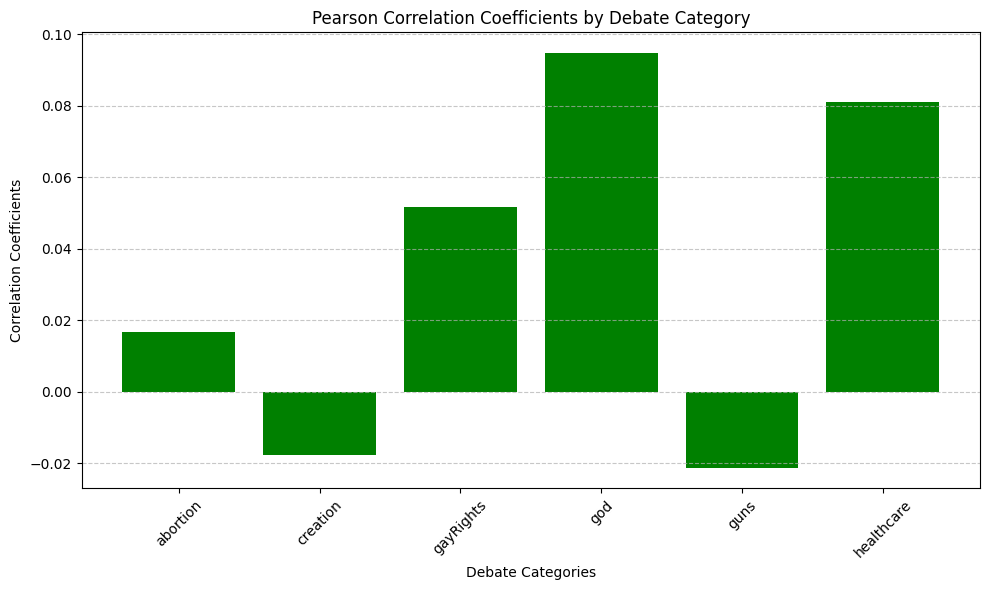

In [22]:
import matplotlib.pyplot as plt

# Extract correlation coefficients and p-values
correlations = [value[0] for value in category_correlations.values()]
categories = list(category_correlations.keys())

# Create a bar chart to visualize correlations
plt.figure(figsize=(10, 6))
plt.bar(categories, correlations, color='green')
plt.xlabel('Debate Categories')
plt.ylabel('Correlation Coefficients')
plt.title('Pearson Correlation Coefficients by Debate Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


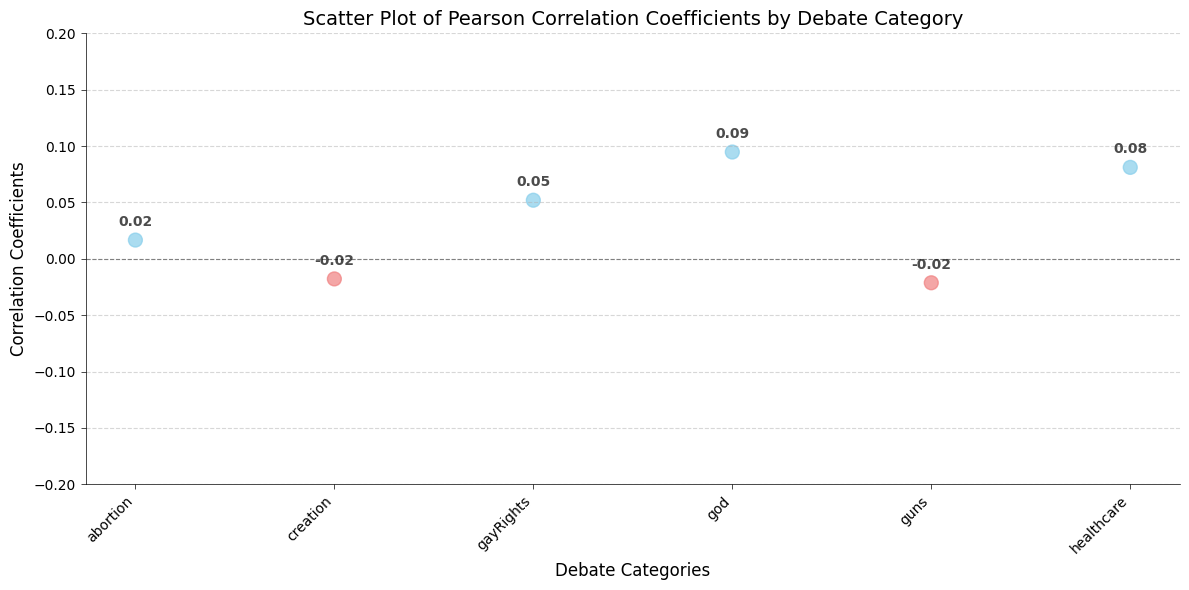

In [ ]:
import matplotlib.pyplot as plt

# Extract correlation coefficients and p-values
correlations = [value[0] for value in category_correlations.values()]
categories = list(category_correlations.keys())

# Create a color map for the points
colors = ['skyblue' if corr >= 0 else 'lightcoral' for corr in correlations]

# Create a scatter plot with improved style
plt.figure(figsize=(12, 6))
plt.scatter(categories, correlations, c=colors, marker='o', s=100, alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Add a reference line at y=0


plt.title('Scatter Plot of Pearson Correlation Coefficients by Debate Category', fontsize=14)
plt.xlabel('Debate Categories', fontsize=12)
plt.ylabel('Correlation Coefficients', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust the frame and grid
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', width=0.5)


for i, corr in enumerate(correlations):
    plt.annotate(f'{corr:.2f}', (categories[i], corr), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, fontweight='bold', color='black', alpha=0.7)

# Set the y-axis limits as needed
plt.ylim(-0.2, 0.2)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
v1_values = []
for index, row in df_original.iterrows():
    if row['Stance'] == 'Pro':
      v1 = 1
    else :
      v1 = -1
    v1_values.append(v1)

df_original['V1'] = v1_values

In [ ]:
# Filter the DataFrame to create separate DataFrames for "Pro" and "Con" stances
df_pro = df_original[df_original['Stance'] == 'Pro']
df_con = df_original[df_original['Stance'] == 'Con']


6.	We want to assess the extent to which the threads are related to debate category titles. For this purpose, use pretrained word2vec model to generate embedding vector for both category title and thread title (in case where there are more than one word in the title, you should take the average of embedding vectors of the words constituting the title). Then take the cosine similarity between the two resulting embedding vectors (category title and thread title). Show the dispersion graph indicating the range of values of the cosine similarity values around each category title (see link in previous project description).

In [47]:
import gdown

# Define the Google Drive file ID
file_id = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"

# Define the output filename
output_file = "GoogleNews-vectors-negative300.bin.gz"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


In [28]:
from gensim.models import KeyedVectors

# Load the Google News Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format(output_file, binary=True)


In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import string

# Create a WordPunctTokenizer
tokenizer = WordPunctTokenizer()

# Stopwords and punctuation removal
stop_words = set(stopwords.words('english'))

import re

def preprocess_text(text):

    # Ensure that 'text' is a string
    text = str(text)

    # Remove underscores, spaces, hyphens, and underscores
    text = re.sub(r'[-_\s]', ' ', text)

    # Tokenize the text
    tokens = tokenizer.tokenize(text)

    # Stopword removal
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Punctuation and special character removal
    filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation]

    # Join the filtered tokens back into a sentence
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text


In [33]:

# Apply the preprocessing function to the 'Thread' column and create a new column 'Thread_V1'
preprocessed = []
for text in df_original["Thread"]:
    after_preprocess = preprocess_text(text)
    preprocessed.append(after_preprocess)

df_original["Thread"] = preprocessed


In [55]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to obtain the average word vector for a text
def get_average_word_vector(text, model):
    words = text.split()
    vectors = [model[word] for word in words if word in model]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Calculate cosine similarity for each category-thread pair
category_titles = df_original['Category']
thread_titles = df_original['Thread']

category_vectors = []
thread_vectors = []
cosine_similarities = []

for i in range(len(df_original)):
    category_title = category_titles[i]
    thread_title = thread_titles[i]

    category_vector = get_average_word_vector(category_title, word2vec_model)
    thread_vector = get_average_word_vector(thread_title, word2vec_model)

    similarity = cosine_similarity([category_vector], [thread_vector])[0][0]

    category_vectors.append(category_vector)
    thread_vectors.append(thread_vector)
    cosine_similarities.append(similarity)

# Add the vectors and cosine similarities as new columns in your DataFrame
df_original['Category_Vector'] = category_vectors
df_original['Thread_Vector'] = thread_vectors
df_original['Cosine_Similarity'] = cosine_similarities


In [56]:
df_original
# filtered_df = df_original[df_original['Category'] == 'Gay Rights']
# filtered_df

,Category,Stance,Stance Text,Thread,Message,V1,V2,V1_scaled,V2_scaled,Thread_V1,Category_Vector,Thread_Vector,Cosine_Similarity
0,god,Con,No,god,I doubt seriously that my dog thinks that I am...,-1,0,-1.118246,0.366740,god,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.26171875, 0.05444336, 0.118652344, 0.085937...",1.000000
1,god,Con,NOPE,God really Exist,There is no evidence to show God does exist so...,-1,0,-1.118246,0.366740,God really Exist,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.2957357, -0.12642415, -0.01578776, 0.005859...",0.455149
2,god,Con,NOPE,God really Exist,"Bravo, well put.",-1,0,-1.118246,0.366740,God really Exist,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.2957357, -0.12642415, -0.01578776, 0.005859...",0.455149
3,god,Con,against,God Exists,There is no evidence for the factual existence...,-1,-4,-1.118246,-2.998309,God Exists,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.3076172, -0.14208984, 0.08105469, 0.1699218...",0.479689
4,god,Con,no its not,life believing God worth,I don't know if life is created from some god ...,-1,0,-1.118246,0.366740,life believing God worth,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.11029053, 0.0284729, 0.03112793, 0.10650635...",0.521167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,guns,Con,No,would allowing students carry weapons make col...,"hundreds of drunk post- teens , showing ...",-1,-1,-1.118246,-0.474522,would allowing students carry weapons make col...,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.030463325, 0.032952204, 0.17778523, 0.1582...",0.353030
7130,guns,Pro,Yes,owning gun make safer,Consider: The Army was used to kill and break...,1,-2,0.894258,-1.315784,owning gun make safer,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.08154297, -0.07659912, 0.1295166, -0.02919...",0.533225
7131,guns,Pro,Yes,owning gun make safer,The point is that my family isn't worth 'playi...,1,-2,0.894258,-1.315784,owning gun make safer,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.08154297, -0.07659912, 0.1295166, -0.02919...",0.533225
7132,guns,Pro,Yes,guns mean americans,"Gun control does not solve the problem, educat...",1,-3,0.894258,-2.157047,guns mean americans,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.033793133, 0.055989582, 0.16894531, 0.3289...",0.637557


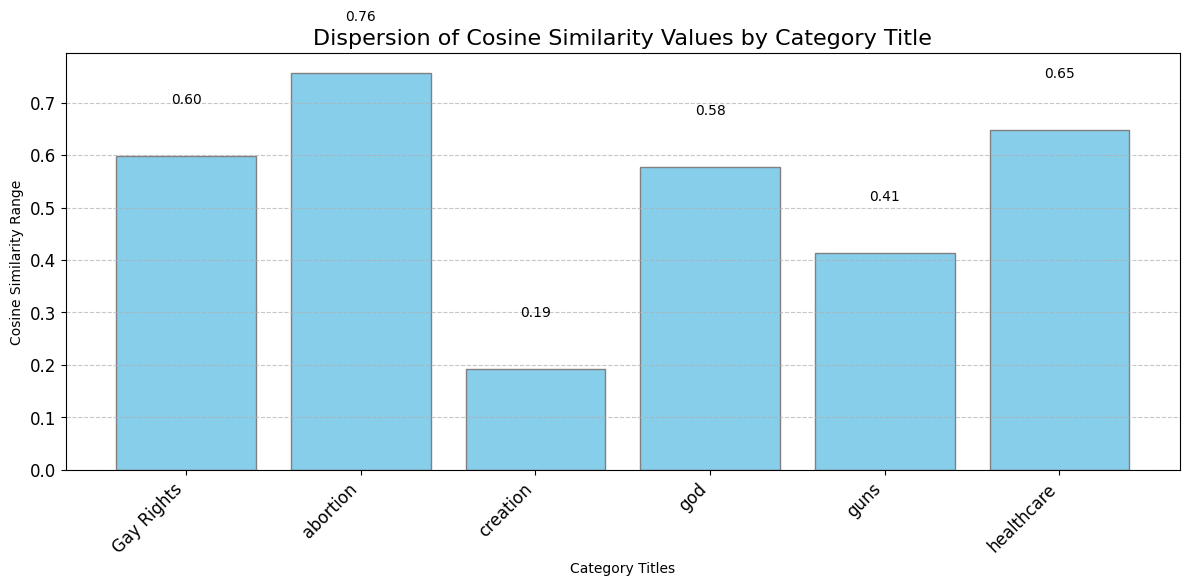

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


grouped = df_original.groupby('Category')

category_titles = []
cosine_ranges = []

for category, group in grouped:
    category_titles.append(category)
    cosine_values = group['Cosine_Similarity'].tolist()
    cosine_range = np.ptp(cosine_values)  # Peak-to-peak (range) of cosine values
    cosine_ranges.append(cosine_range)

plt.figure(figsize=(12, 6))
plt.bar(category_titles, cosine_ranges, color='skyblue', edgecolor='gray')  # Custom color and edge color
plt.xlabel('Category Titles')
plt.ylabel('Cosine Similarity Range')
plt.title('Dispersion of Cosine Similarity Values by Category Title', fontsize=16)  # Larger title font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and right-align x-axis labels with a larger font size
plt.yticks(fontsize=12)  # Larger font size for y-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(category_titles)):
    plt.text(i, cosine_ranges[i] + 0.1, f'{cosine_ranges[i]:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


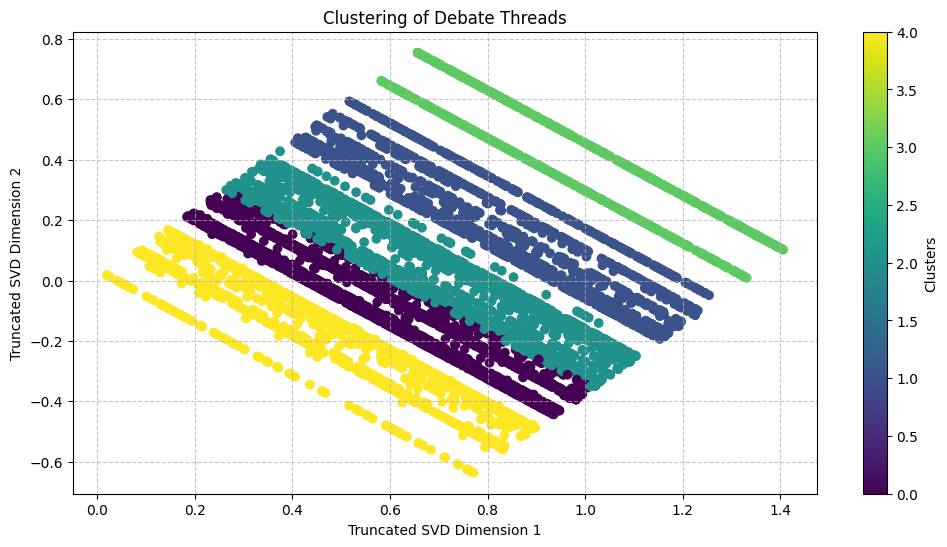

In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


n_clusters = 5  # Adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)


cosine_similarities = df_original['Cosine_Similarity'].values.reshape(-1, 1)
df_original['Cluster'] = kmeans.fit_predict(cosine_similarities)


synthetic_dimension = np.random.rand(len(df_original))


n_components = 2
svd = TruncatedSVD(n_components=n_components)
reduced_data = np.column_stack((cosine_similarities, synthetic_dimension))
reduced_cosine_similarities = svd.fit_transform(reduced_data)


df_original['SVD_1'] = reduced_cosine_similarities[:, 0]
df_original['SVD_2'] = reduced_cosine_similarities[:, 1]

# Visualize the clusters
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df_original['SVD_1'], df_original['SVD_2'], c=df_original['Cluster'], cmap='viridis')
plt.colorbar(scatter, label='Clusters')
plt.xlabel('Truncated SVD Dimension 1')
plt.ylabel('Truncated SVD Dimension 2')
plt.title('Clustering of Debate Threads')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


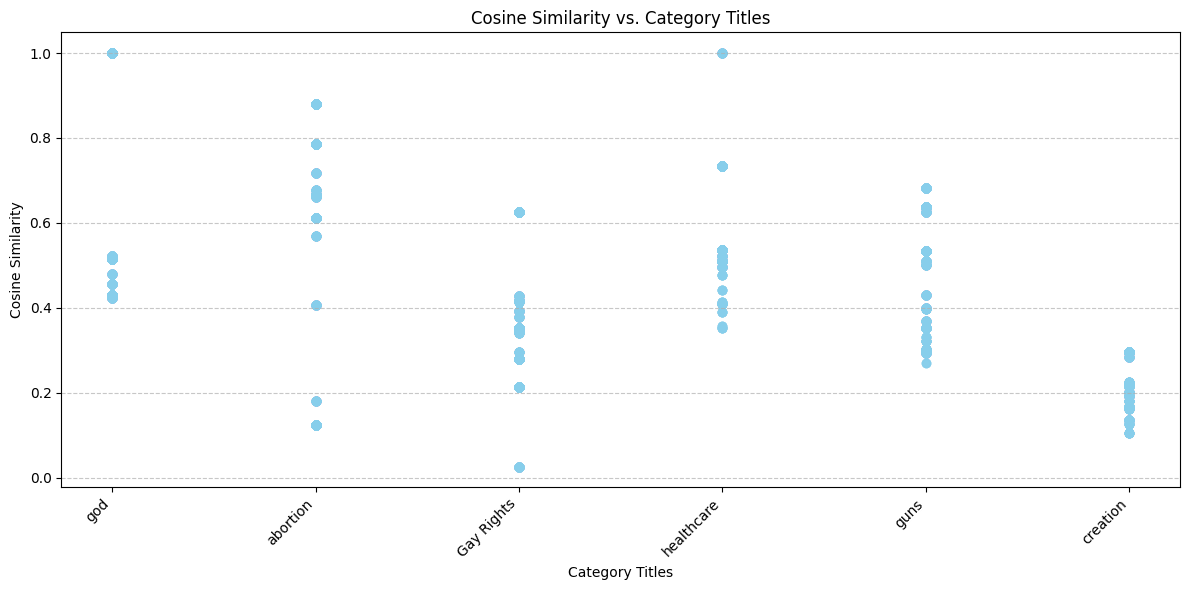

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_original['Category'], df_original['Cosine_Similarity'], color='skyblue', alpha=0.7)
plt.xlabel('Category Titles')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity vs. Category Titles')
plt.xticks(rotation=45, ha='right')  # Rotate and right-align x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


7.	We want to comprehend the content of each discussion post and evaluate the coherence of the discussions related to the same thread. For this purpose, use Empath category GitHub - Ejhfast/empath-client: analyze text with empath  to generate category list and associated matching scores. We shall assume the output as an embedding vector where the components are the empath classes (or categories)  whose values correspond to the matching scores generated by the library. Write a script that generates such an embedding vector for both thread title and each of the argument text part. Then use the cosine similarity between the two embedding vectors as a matching between thread and argument. Estimate the average score (together with standard deviation and kurtosis) of cosine similarity values associated to the same thread. Illustrate the result using a graphical illustration of your choice to show the coherence of the argument parts with the associated thread titles in each category.

In [24]:
df_original

,Category,Stance,Stance Text,Thread,Message,V1,V2,V1_scaled,V2_scaled
0,healthcare,Pro,"Oh, yes please. Thank you.",So_you_still_want_Nationalized_Health_Care,I can say from experience that as a former sol...,1,1,0.894258,1.208003
1,healthcare,Pro,"Yes, it's a right.",Should_America_have_Universal_Healthcare,As a christain i feel i have to help my fellow...,1,1,0.894258,1.208003
2,healthcare,Pro,Pro,Debate:_Public_insurance_option_in_US_health_care,Public insurance offers a valuable check on pr...,1,1,0.894258,1.208003
3,healthcare,Pro,Yes,Debate:_Single-payer_universal_health_care,Free universal health care motivates people to...,1,1,0.894258,1.208003
4,healthcare,Pro,"Oh, yes please. Thank you.",So_you_still_want_Nationalized_Health_Care,I am not disputing that productive people lead...,1,0,0.894258,0.366740
...,...,...,...,...,...,...,...,...,...
7129,creation,Con,No,does-intelligent-design-have-merit,--TJ10--Open debate is all we are asking for. ...,-1,-1,-1.118246,-0.474522
7130,creation,Con,No,does-intelligent-design-have-merit,the physical reality to which Behe so proudly ...,-1,1,-1.118246,1.208003
7131,creation,Con,No,does-intelligent-design-have-merit,"""TODAY, one of the fundamental goals of scient...",-1,1,-1.118246,1.208003
7132,creation,Con,No,does-intelligent-design-have-merit,"I am not welcome at UcD, a site which takes pr...",-1,-1,-1.118246,-0.474522


In [34]:
df_original["Thread"] = df_original["Thread"].apply(preprocess_text)

In [35]:
df_original["Message"] = df_original["Message"].apply(preprocess_text)

In [36]:
!pip install empath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57801 sha256=b90644f3d579e79fd7c01292bb3a1b9762a7e7dbc176363a2aecd305ffbb226c
  Stored in directory: /root/.cache/pip/wheels/92/b3/83/9eb2c6199881e2385a59d99bd911363475060ebeb4bdb27242
Successfully built empath


In [37]:
from empath import Empath

# Create an Empath object
lexicon = Empath()

def analyze_with_empath(text):
    # Analyze the text using Empath and normalize the results
    return lexicon.analyze(text, normalize=True)


In [38]:
# Apply the function to create new columns
df_original["Thread_Empath"] = df_original["Thread"].apply(analyze_with_empath)
df_original["Message_Empath"] = df_original["Message"].apply(analyze_with_empath)


In [68]:
df_original

,Category,Stance,Stance Text,Thread,Message,V1,V2,V1_scaled,V2_scaled,Thread_V1,Category_Vector,Thread_Vector,Cosine_Similarity,Cluster,SVD_1,SVD_2,Thread_Empath,Message_Empath
0,god,Con,No,god,doubt seriously dog thinks God might slightly ...,-1,0,-1.118246,0.366740,god,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.26171875, 0.05444336, 0.118652344, 0.085937...",1.000000,3,1.278836,0.212525,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.021276..."
1,god,Con,NOPE,God really Exist,evidence show God exist God exist,-1,0,-1.118246,0.366740,God really Exist,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.2957357, -0.12642415, -0.01578776, 0.005859...",0.455149,2,0.733041,-0.034712,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
2,god,Con,NOPE,God really Exist,Bravo well put,-1,0,-1.118246,0.366740,God really Exist,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.2957357, -0.12642415, -0.01578776, 0.005859...",0.455149,2,0.868675,-0.152794,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
3,god,Con,against,God Exists,evidence factual existence god whatsoever whol...,-1,-4,-1.118246,-2.998309,God Exists,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.3076172, -0.14208984, 0.08105469, 0.1699218...",0.479689,2,0.741371,-0.009426,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
4,god,Con,no its not,life believing God worth,know life created god random spawn universe li...,-1,0,-1.118246,0.366740,life believing God worth,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.11029053, 0.0284729, 0.03112793, 0.10650635...",0.521167,2,0.857693,-0.055701,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,guns,Con,No,would allowing students carry weapons make col...,hundreds drunk post teens showing peers trying...,-1,-1,-1.118246,-0.474522,would allowing students carry weapons make col...,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.030463325, 0.032952204, 0.17778523, 0.1582...",0.353030,0,0.685002,-0.128286,"{'help': 0.1111111111111111, 'office': 0.0, 'd...","{'help': 0.00303951367781155, 'office': 0.0121..."
7130,guns,Pro,Yes,owning gun make safer,Consider Army used kill break striking coal mi...,1,-2,0.894258,-1.315784,owning gun make safer,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.08154297, -0.07659912, 0.1295166, -0.02919...",0.533225,2,0.481372,0.287908,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
7131,guns,Pro,Yes,owning gun make safer,point family worth playing odds going stand sa...,1,-2,0.894258,-1.315784,owning gun make safer,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.08154297, -0.07659912, 0.1295166, -0.02919...",0.533225,2,1.024267,-0.184732,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.03571428571428571, 'office': 0.0, '..."
7132,guns,Pro,Yes,guns mean americans,Gun control solve problem education Watch thre...,1,-3,0.894258,-2.157047,guns mean americans,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.033793133, 0.055989582, 0.16894531, 0.3289...",0.637557,1,1.158612,-0.163361,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."


In [69]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define a function to calculate cosine similarity
def calculate_cosine_similarity(row):
    thread_empath_values = np.array(list(row["Thread_Empath"].values())) if row["Thread_Empath"] is not None else np.zeros(EMPATH_VECTOR_LENGTH)
    message_empath_values = np.array(list(row["Message_Empath"].values())) if row["Message_Empath"] is not None else np.zeros(EMPATH_VECTOR_LENGTH)
    similarity_score = cosine_similarity([thread_empath_values], [message_empath_values])
    return similarity_score[0][0]

EMPATH_VECTOR_LENGTH = len(list(df_original["Thread_Empath"].iloc[0].keys()))


df_original["CosineSimilarity"] = df_original.apply(calculate_cosine_similarity, axis=1)



In [70]:
df_original

,Category,Stance,Stance Text,Thread,Message,V1,V2,V1_scaled,V2_scaled,Thread_V1,Category_Vector,Thread_Vector,Cosine_Similarity,Cluster,SVD_1,SVD_2,Thread_Empath,Message_Empath,CosineSimilarity
0,god,Con,No,god,doubt seriously dog thinks God might slightly ...,-1,0,-1.118246,0.366740,god,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.26171875, 0.05444336, 0.118652344, 0.085937...",1.000000,3,1.278836,0.212525,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.021276...",0.000000
1,god,Con,NOPE,God really Exist,evidence show God exist God exist,-1,0,-1.118246,0.366740,God really Exist,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.2957357, -0.12642415, -0.01578776, 0.005859...",0.455149,2,0.733041,-0.034712,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",0.000000
2,god,Con,NOPE,God really Exist,Bravo well put,-1,0,-1.118246,0.366740,God really Exist,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.2957357, -0.12642415, -0.01578776, 0.005859...",0.455149,2,0.868675,-0.152794,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",0.000000
3,god,Con,against,God Exists,evidence factual existence god whatsoever whol...,-1,-4,-1.118246,-2.998309,God Exists,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.3076172, -0.14208984, 0.08105469, 0.1699218...",0.479689,2,0.741371,-0.009426,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",0.000000
4,god,Con,no its not,life believing God worth,know life created god random spawn universe li...,-1,0,-1.118246,0.366740,life believing God worth,"[0.26171875, 0.05444336, 0.118652344, 0.085937...","[0.11029053, 0.0284729, 0.03112793, 0.10650635...",0.521167,2,0.857693,-0.055701,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",0.371391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,guns,Con,No,would allowing students carry weapons make col...,hundreds drunk post teens showing peers trying...,-1,-1,-1.118246,-0.474522,would allowing students carry weapons make col...,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.030463325, 0.032952204, 0.17778523, 0.1582...",0.353030,0,0.685002,-0.128286,"{'help': 0.1111111111111111, 'office': 0.0, 'd...","{'help': 0.00303951367781155, 'office': 0.0121...",0.135681
7130,guns,Pro,Yes,owning gun make safer,Consider Army used kill break striking coal mi...,1,-2,0.894258,-1.315784,owning gun make safer,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.08154297, -0.07659912, 0.1295166, -0.02919...",0.533225,2,0.481372,0.287908,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",0.511891
7131,guns,Pro,Yes,owning gun make safer,point family worth playing odds going stand sa...,1,-2,0.894258,-1.315784,owning gun make safer,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.08154297, -0.07659912, 0.1295166, -0.02919...",0.533225,2,1.024267,-0.184732,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.03571428571428571, 'office': 0.0, '...",0.105409
7132,guns,Pro,Yes,guns mean americans,Gun control solve problem education Watch thre...,1,-3,0.894258,-2.157047,guns mean americans,"[0.0065307617, 0.1875, 0.41992188, 0.104003906...","[-0.033793133, 0.055989582, 0.16894531, 0.3289...",0.637557,1,1.158612,-0.163361,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...",0.143346


In [71]:
non_zero_cosine_similarity_count = (df_original['CosineSimilarity'] != 0).sum()
non_zero_cosine_similarity_count

3597

In [73]:
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Group the data by the "Thread" column
thread_groups = df_original.groupby("Thread")

# Initialize lists to store statistics
thread_names = []  # List of thread names
mean_scores = []  # List of mean scores
std_devs = []  # List of standard deviations
kurtosis_values = []  # List of kurtosis values

# Calculate statistics for each thread
for thread, group in thread_groups:
    similarity_scores = group["CosineSimilarity"].values
    mean_score = np.mean(similarity_scores)
    std_dev = np.std(similarity_scores)
    kurtosis_value = kurtosis(similarity_scores)  # Using the scipy kurtosis function

    thread_names.append(thread)
    mean_scores.append(mean_score)
    std_devs.append(std_dev)
    kurtosis_values.append(kurtosis_value)

for i in range(len(thread_names)):
    thread = thread_names[i]
    mean_score = mean_scores[i]
    std_dev = std_devs[i]
    kurtosis_value = kurtosis_values[i]

    print(f"Thread: {thread}")
    print(f"Mean Cosine Similarity: {mean_score:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Kurtosis: {kurtosis_value:.2f}")
    print()


Thread: Abortion Banned
Mean Cosine Similarity: 0.00
Standard Deviation: 0.00
Kurtosis: nan

Thread: America Universal Healthcare
Mean Cosine Similarity: 0.00
Standard Deviation: 0.00
Kurtosis: nan

Thread: Creationism Evolution
Mean Cosine Similarity: 0.00
Standard Deviation: 0.00
Kurtosis: nan

Thread: Creationism Wrong
Mean Cosine Similarity: 0.00
Standard Deviation: 0.00
Kurtosis: nan

Thread: Debate Abortion
Mean Cosine Similarity: 0.00
Standard Deviation: 0.00
Kurtosis: nan

Thread: Debate Adoption children sex couples
Mean Cosine Similarity: 0.10
Standard Deviation: 0.20
Kurtosis: 3.98

Thread: Debate Armed pilots airplanes
Mean Cosine Similarity: 0.00
Standard Deviation: 0.00
Kurtosis: nan

Thread: Debate Assault weapons ban United States
Mean Cosine Similarity: 0.00
Standard Deviation: 0.00
Kurtosis: nan

Thread: Debate Creationism vs evolution schools
Mean Cosine Similarity: 0.26
Standard Deviation: 0.21
Kurtosis: -0.95

Thread: Debate DC handgun ban
Mean Cosine Similarity: 0

<ipython-input-74-22c5628cd6b1>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


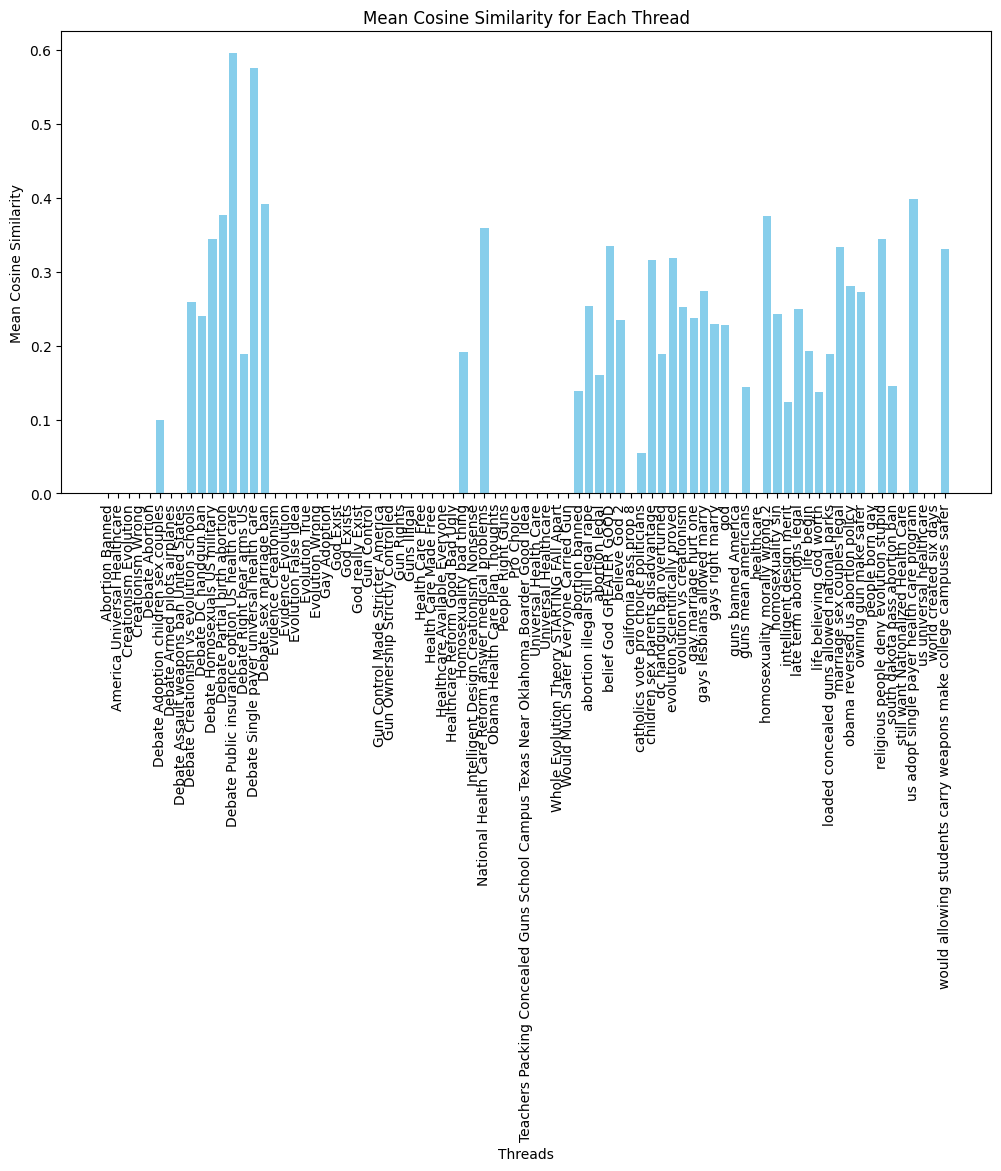

In [74]:
import matplotlib.pyplot as plt

# bar chart for mean cosine similarity values
plt.figure(figsize=(12, 6))
plt.bar(thread_names, mean_scores, color='skyblue')
plt.xlabel('Threads')
plt.ylabel('Mean Cosine Similarity')
plt.title('Mean Cosine Similarity for Each Thread')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-38-5be12b602ed1>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


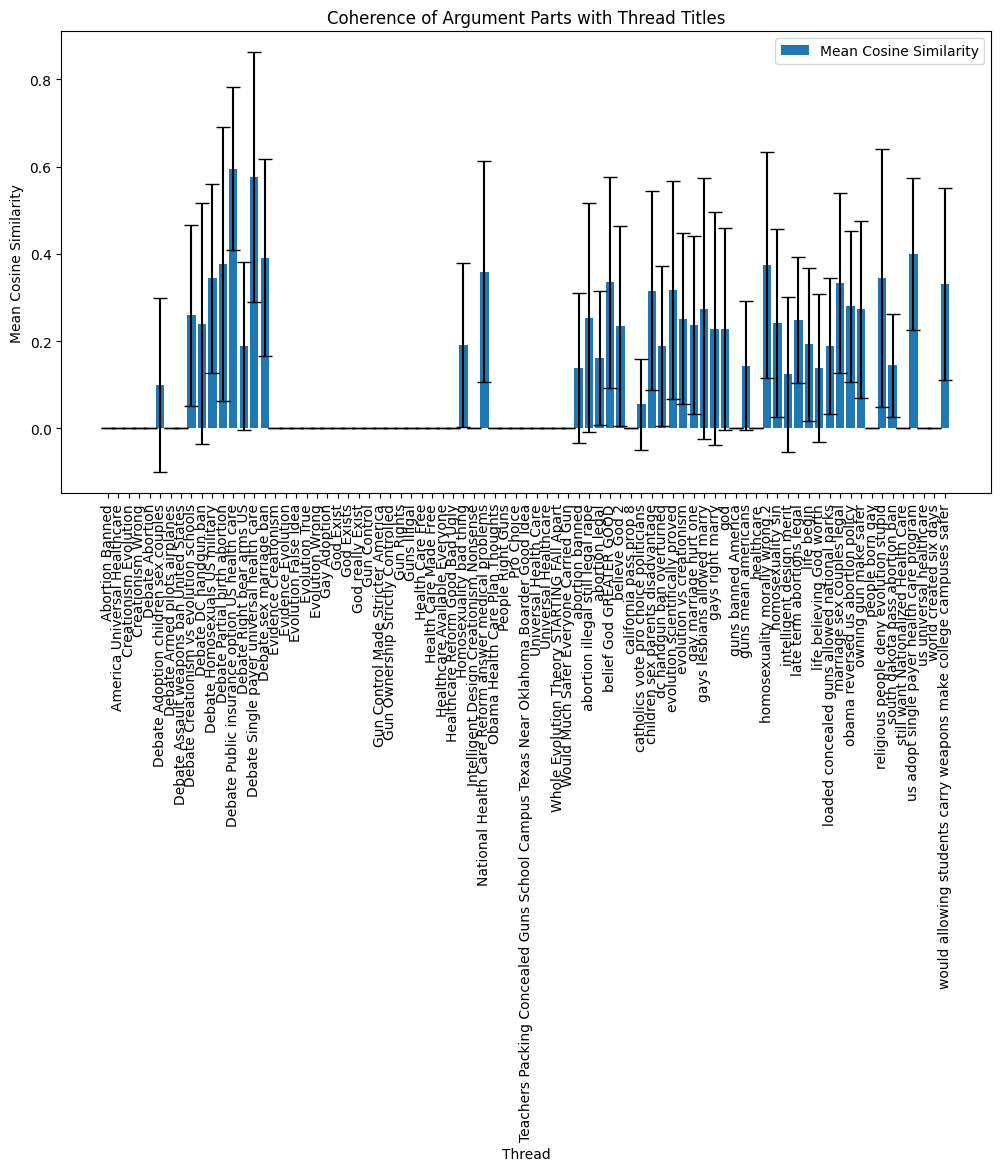

In [ ]:
# Create a bar chart to illustrate the results
plt.figure(figsize=(12, 6))
plt.bar(thread_names, mean_scores, yerr=std_devs, capsize=5, label="Mean Cosine Similarity")
plt.xlabel("Thread")
plt.ylabel("Mean Cosine Similarity")
plt.title("Coherence of Argument Parts with Thread Titles")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-131-87a1eb8b3108>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


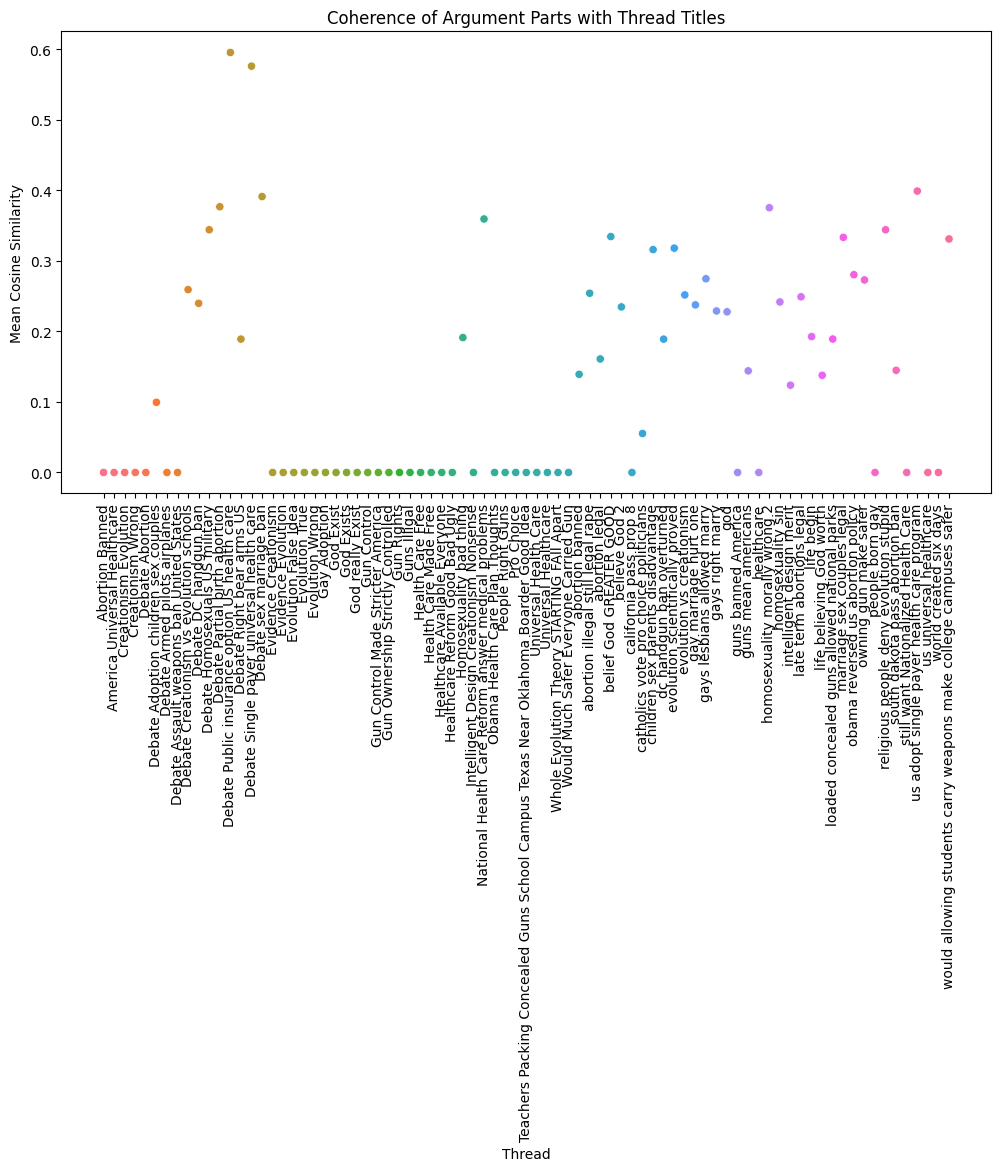

In [ ]:
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=thread_names, y=mean_scores, hue=thread_names, legend=False)
plt.xlabel("Thread")
plt.ylabel("Mean Cosine Similarity")
plt.title("Coherence of Argument Parts with Thread Titles")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-41-1c3cc1959c5a>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


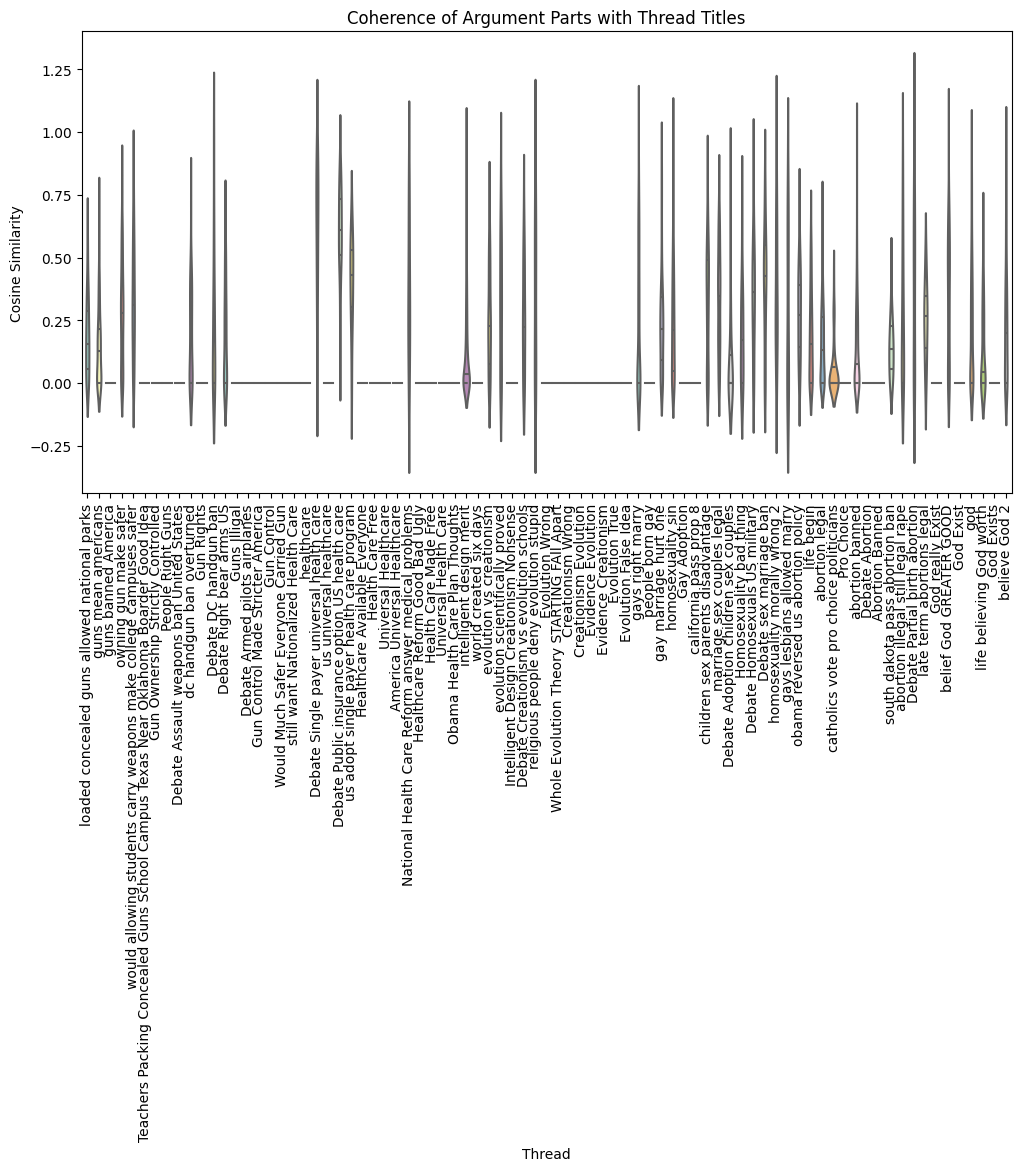

In [ ]:
import seaborn as sns

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Thread", y="CosineSimilarity", data=df_original, inner="quart", palette="Set3")
plt.xlabel("Thread")
plt.ylabel("Cosine Similarity")
plt.title("Coherence of Argument Parts with Thread Titles")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


8.	We want to further elucidate the argument text and comprehend the pro and con reasoning. For this purpose, we shall consider the context of modal verbs (must, should, might, ought, would, could, will, may). Write a script that scrutinizes the content of the argument text leg to identify modal verb and the surrounding tokens in a window of three tokens on left and three token on right of modal verb, then retrieve the subject and complement of the modal verb by scrutinizing the part of speech tag of the tokens on left- and right-hand side, if any, using simple heuristic. Repeat this process for both pro and con argument. Save the result in a database file of your choice.    

In [8]:
import pandas as pd
import spacy
from collections import defaultdict
import json


In [9]:
nlp = spacy.load("en_core_web_sm")


In [32]:
def extract_modal_info(text):
    text = str(text)
    doc = nlp(text)
    modal_info = []

    for token in doc:
        if (token.pos_ == "VERB" or token.dep_ == "aux") and token.text.lower() in ["must", "should", "might", "ought", "would", "could", "will", "may","need"]:
            modal_verb = token.text
            context = []  # Initialize an empty list

            # Define a window of three tokens on both sides
            window_size = 3
            start_index = max(0, token.i - window_size)
            end_index = min(len(doc), token.i + window_size + 1)

            for i in range(start_index, end_index):
                context_token = doc[i]
                context.append((context_token.text, context_token.pos_))

            modal_info.append({
                "ModalVerb": modal_verb,
                "Context": context
            })

    return modal_info


In [33]:
import pandas as pd

# This is a test for checking if our code is working
df_test = pd.DataFrame({"Text": ["Look European countries banned guns Guess nothing changed people want kill find way get gun want get rid hunting trillion year industry ban guns millions jobs would lost THINK RECESSION idiot"]})

df_test["Modal_Info"] = df_test["Text"].apply(extract_modal_info)

# Display the DataFrame
print(df_test)


                                                Text  \
0  Look European countries banned guns Guess noth...   

                                          Modal_Info  
0  [{'ModalVerb': 'would', 'Context': [('guns', '...  


In [13]:
# Create DataFrames for Pro and Con arguments
pro_arguments = df_original[df_original["Stance"] == "Pro"].copy()
con_arguments = df_original[df_original["Stance"] == "Con"].copy()

,Category,Stance,Stance Text,Thread,Message,V1,V2,V1_scaled,V2_scaled,Thread_Empath,Message_Empath
5,healthcare,Con,No,us universal healthcare,"[moral, forcing, every, single, citizen, singl...",-1,2,-1.118246,2.049265,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
7,healthcare,Con,Con,Debate Public insurance option US health care,"[Public, insurance, discourage, people, becomi...",-1,-2,-1.118246,-1.315784,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
10,healthcare,Con,Private Health care,Universal Healthcare,"[think, universal, healthcare, sounds, warm, f...",-1,-2,-1.118246,-1.315784,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.018779342723004695, 'office': 0.014..."
11,healthcare,Con,Con,Debate Public insurance option US health care,"[Employers, may, dump, employees, public, insu...",-1,0,-1.118246,0.366740,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.009009009009009009, ..."
12,healthcare,Con,"No, it's not feasible.",America Universal Healthcare,"[Redistribution, wealth, something, Democrats,...",-1,-2,-1.118246,-1.315784,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
...,...,...,...,...,...,...,...,...,...,...,...
7129,creation,Con,No,intelligent design merit,"[TJ10, Open, debate, asking, Even, Discovery, ...",-1,-1,-1.118246,-0.474522,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
7130,creation,Con,No,intelligent design merit,"[physical, reality, Behe, proudly, points, sty...",-1,1,-1.118246,1.208003,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
7131,creation,Con,No,intelligent design merit,"[TODAY, one, fundamental, goals, scientists, s...",-1,1,-1.118246,1.208003,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.00423728813559322, 'office': 0.0042..."
7132,creation,Con,No,intelligent design merit,"[welcome, UcD, site, takes, pride, ignorance, ...",-1,-1,-1.118246,-0.474522,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."


In [36]:
def tokenize_text(text):
    if text is not None and isinstance(text, str):
        return [token.text for token in nlp(text)]
    else:
        return []
pro_arguments["Message"] = pro_arguments["Message"].apply(preprocess_text)
con_arguments["Message"] = con_arguments["Message"].apply(preprocess_text)

pro_arguments["Message"] = pro_arguments["Message"].apply(tokenize_text)
con_arguments["Message"] = con_arguments["Message"].apply(tokenize_text)

In [37]:
pro_arguments["ModalInfo"] = pro_arguments["Message"].apply(extract_modal_info)
con_arguments["ModalInfo"] = con_arguments["Message"].apply(extract_modal_info)


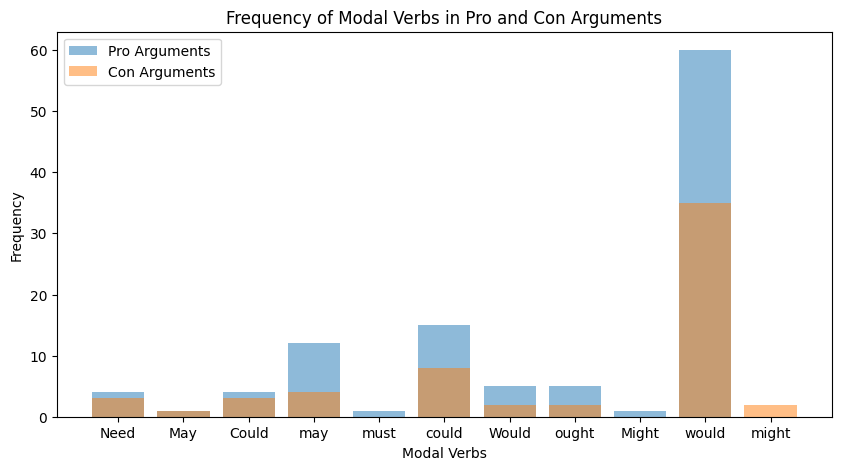

In [38]:
import matplotlib.pyplot as plt

pro_modal_verbs = [item['ModalVerb'] for sublist in pro_arguments['ModalInfo'] for item in sublist]
con_modal_verbs = [item['ModalVerb'] for sublist in con_arguments['ModalInfo'] for item in sublist]

pro_modal_counts = {modal: pro_modal_verbs.count(modal) for modal in set(pro_modal_verbs)}
con_modal_counts = {modal: con_modal_verbs.count(modal) for modal in set(con_modal_verbs)}

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(pro_modal_counts.keys(), pro_modal_counts.values(), label='Pro Arguments', alpha=0.5)
plt.bar(con_modal_counts.keys(), con_modal_counts.values(), label='Con Arguments', alpha=0.5)
plt.xlabel('Modal Verbs')
plt.ylabel('Frequency')
plt.title('Frequency of Modal Verbs in Pro and Con Arguments')
plt.legend()
plt.show()


In [47]:
# Save the results to JSON files
pro_arguments.to_json("pro_modal_info.json", orient="records", lines=True)
con_arguments.to_json("con_modal_info.json", orient="records", lines=True)


9.	We want to test the hypothesis that whether some argument texts contain negation operator or not. Write a script that identifies “no”, “not”, “‘nt” and similar patterns indicating presence of negation in the text. Then use a binary variable to indicate the presence or absence of negation in argument text, for both Pro and Con arguments. Provide a histogram showing the percentage of arguments presenting negation operator in Pro and Con labels for each debate category.      

In [46]:
import re
# Function to check for negation
def contains_negation(text):
    if isinstance(text, str):
        negation_pattern = r'\b(?:no|not|n\'t|never|none|neither|nowhere|nowhere|noone|nor)\b'
        match = re.search(negation_pattern, text, flags=re.IGNORECASE)
        return 1 if match else 0
    else:
        return 0  # Handle non-string

df_original['NegationPresent'] = df_original['Message'].apply(contains_negation)


pro_arguments = df_original[df_original["Stance"] == "Pro"].copy()
con_arguments = df_original[df_original["Stance"] == "Con"].copy()

pro_grouped = pro_arguments.groupby('Category')['NegationPresent'].mean() * 100
con_grouped = con_arguments.groupby('Category')['NegationPresent'].mean() * 100



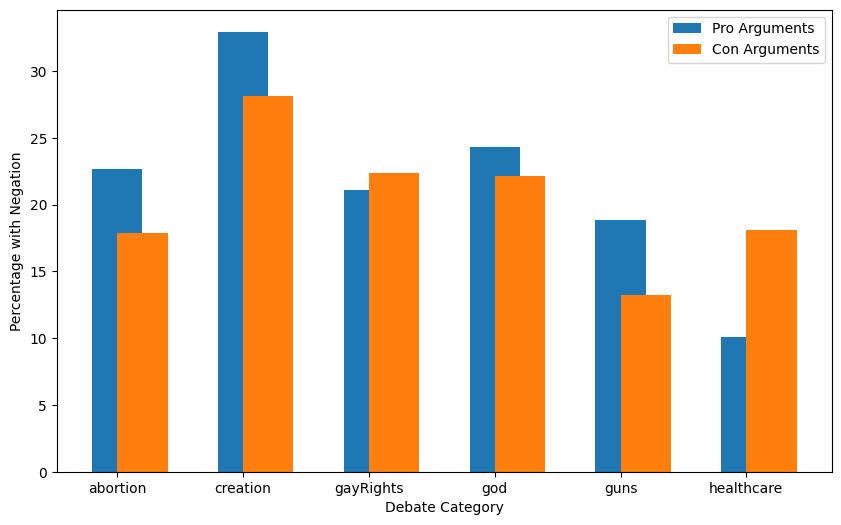

In [ ]:
# Create histograms
plt.figure(figsize=(10, 6))
plt.bar(pro_grouped.index, pro_grouped, width=0.4, align='center', label='Pro Arguments')
plt.bar(con_grouped.index, con_grouped, width=0.4, align='edge', label='Con Arguments')
plt.xlabel('Debate Category')
plt.ylabel('Percentage with Negation')
plt.legend()
plt.show()